# Data Expo 2009 - Airline on-time performance
## by Abdalla Mohamed

## Investigation Overview

In this investigation, I wanted to look at how American Airlines, flights on time perfromance at the  Dallas Fort Worth (DFW) Airport measures. The main variables investigated are hour of day flight is scheduled, day of the week, and month of the year.

## Dataset Overview

The data analyzed is the on time performance during the year 2005. This 2005 file is a list of 7,140,596 flights of which 328,972 are for American Airlines (AA) flights into and out of DFW airport. The variables included are: date, departure time, arrival time, scheduled arrival, scheudled departure, flight number, origin airport, destination airport and a few other variables. To have a clean analysis, 11,469 rows were dropped due to missing arrival and departure delay times.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load dataset
df = pd.read_csv('2005.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0


In [5]:
# create a dataframe for American Airlines flights only
df_aa = df[df['UniqueCarrier']=='AA'].reset_index(drop=True)

# drop the rows that dont have data for Departure time
# drop rows that dont have data for Arrival time
df_aa = df_aa[df_aa.DepTime.notna()]
df_aa = df_aa[df_aa.ArrTime.notna()]

In [6]:
def cleanDates(df, yVar):
    '''
    this function is used to convert the float format given for some date variables and converts it into
    a datetime format
    '''
    # change the data type to datetime
    df[yVar] = df[yVar].astype(str).str.replace('.0', '', regex=True)    # remove the '.0'
    df[yVar] = df[yVar].str.zfill(4)    # add leading zero if less than 4  digit
    df[yVar] = df[yVar].str[:2] + ':' + df[yVar].str[2:]    # add ":" time seperator between hour and minute
    df[yVar] = df[yVar].str.replace('24', '00')    # replace all hours that read 24 into 00
    df[yVar] = pd.to_datetime(df[yVar], format='%H:%M')
    
    return df[yVar]

In [7]:
# change to appropriate datatypes

# change the data type for flight number to string
df_aa['FlightNum'] = df_aa['FlightNum'].astype(str)

df_aa['DepTime'] = cleanDates(df_aa, 'DepTime')
df_aa['CRSDepTime'] = cleanDates(df_aa, 'CRSDepTime')
df_aa['ArrTime'] = cleanDates(df_aa, 'ArrTime')
df_aa['CRSArrTime'] = cleanDates(df_aa, 'CRSArrTime')

In [8]:
# create 2 dataframes. one for outbound flights from DFW airport and one for inbound flights to DFW airport
dfw_outbound = df_aa.query('Origin == "DFW" ').reset_index(drop=True)
dfw_inbound = df_aa.query('Dest == "DFW" ').reset_index(drop=True)

# convert the intergers given into the full name for day of week
DayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dfw_inbound['day_name'] = dfw_inbound['DayOfWeek'].map(DayOfWeek)   # map the DayOfWeek dictionary to convert into name
dfw_inbound['hour'] = dfw_inbound.CRSArrTime.dt.hour                # create new hour column

# convert the intergers given into the full name for day of week
DayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dfw_outbound['day_name'] = dfw_outbound['DayOfWeek'].map(DayOfWeek)  # map the DayOfWeek dictionary to convert into name
dfw_outbound['hour'] = dfw_outbound.CRSDepTime.dt.hour               # create new hour column

In [9]:
# create a datafram that combines all DFW flights, both outbound and inbound
dfw = [dfw_inbound, dfw_outbound]
dfw = pd.concat(dfw).reset_index(drop=True)

## Distribution of Outbound flights

We can see that there is a wide range of flight frequncies, some fly out of DFW airport daily and some only once a year. A good proportion fly almost daily. There are 6 daily outbound flights

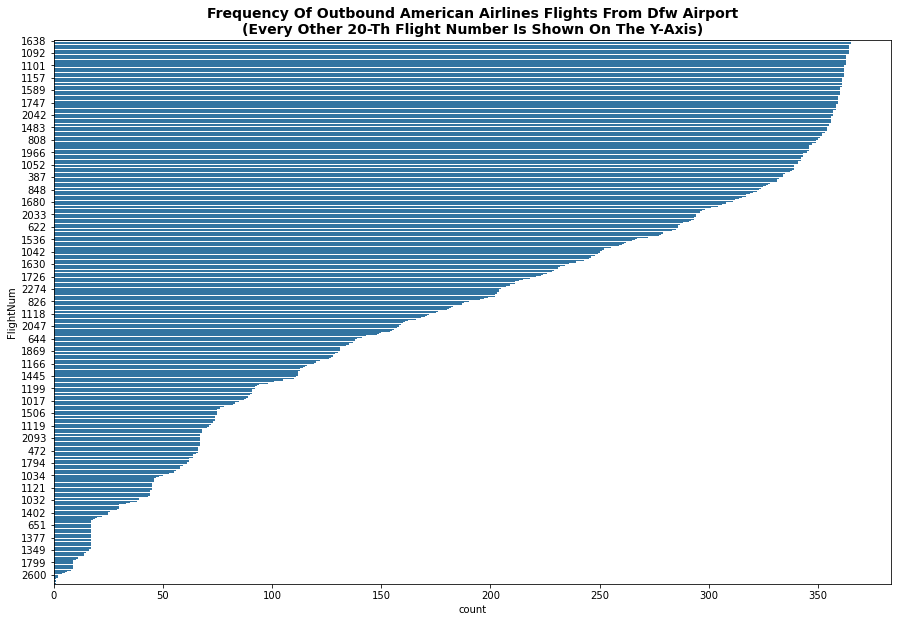

In [38]:
# lets take a look at the frequency of American Airlines flights outbound from DFW airport
plt.figure(figsize=[15, 10])
base_color = sb.color_palette()[0]

order = dfw_outbound.FlightNum.value_counts().index

sb.countplot(data=dfw_outbound, y='FlightNum', order=order, color=base_color);
plt.title('Frequency of Outbound American Airlines flights from DFW airport\n(Every other 20-th flight number is shown on the y-axis)'.title(),
          fontsize=14, weight='bold')
          
# get current y ticks labels and positions
pos, lab =plt.yticks()

# set new y tick labels every 20th 
plt.yticks(pos[::20], lab[::20]);

## Distribution of Inbound flights

We see the flights frequency also has a wide range with some flights flying into DFW daily and and others just once a year. There is a smaller portion which fly almost daily compared to the outbound flights. There is only 1 daily inbound flight, which is flight number 8 

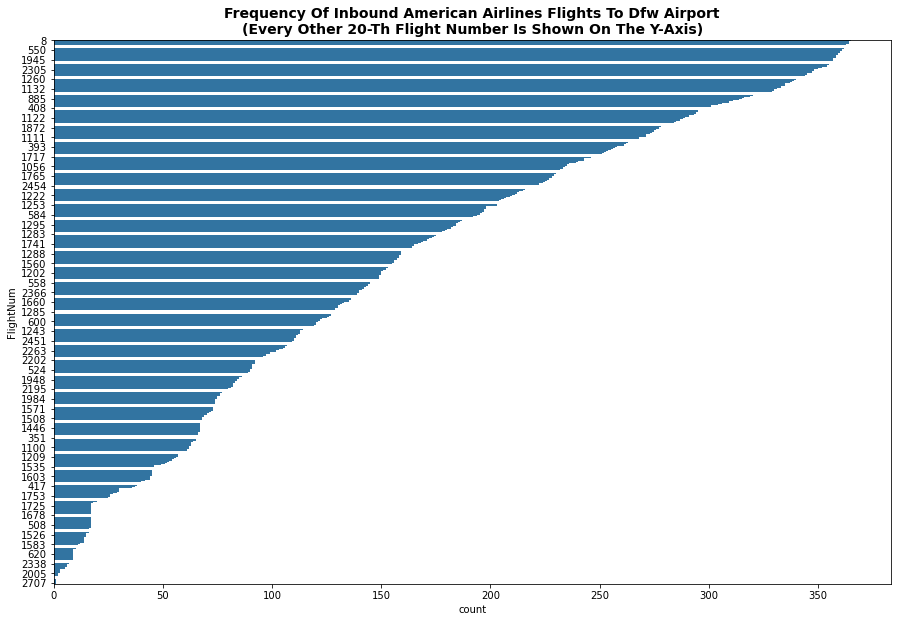

In [39]:
# lets take a look at the frequency of American Airlines inbound to DFW airport
plt.figure(figsize=[15, 10])
base_color = sb.color_palette()[0]

order = dfw_inbound.FlightNum.value_counts().index

sb.countplot(data=dfw_inbound, y='FlightNum', order=order, color=base_color);

plt.title('Frequency of Inbound American Airlines flights to DFW airport\n(Every other 20-th flight number is shown on the y-axis)'.title(),
          fontsize=14, weight='bold')
          
# get current y ticks labels and positions
pos, lab =plt.yticks()

# set new y tick labels every 20th 
plt.yticks(pos[::20], lab[::20]);

## Distribution of Flights by Day of Month

The order of the days of the months were kept as they are since they have an inherent order. It is expected for the 31st day to have the least amount of flights since not all months have 31 days. On average, the 11th day of a month have the most flights scheduled

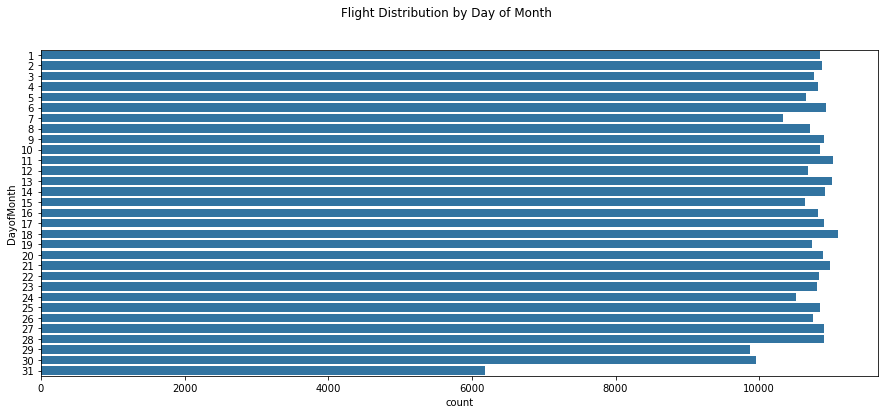

In [11]:
# lets take a look at the frequency of flights by day of month
dom = dfw.DayofMonth.value_counts()
base_color = sb.color_palette()[0]
#order = dfw.DayofMonth.value_counts().index

plt.figure(figsize=[15,6])
sb.countplot(data=dfw, y='DayofMonth', color=base_color)
plt.suptitle('Flight Distribution by Day of Month');

## Distribution of Flights by Month

The order of the months are kept as is since there is an inherent order in months. July and August are the months with the most frequent flights

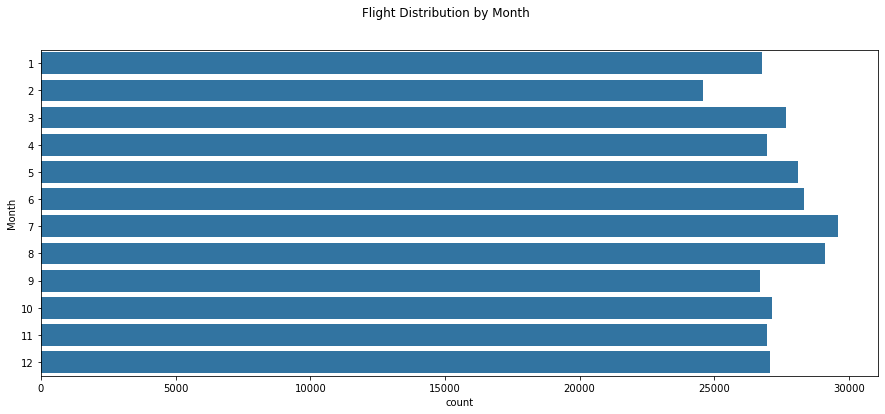

In [12]:
# lets take a look at the frequency of flights by month
month = dfw.Month.value_counts()
base_color = sb.color_palette()[0]
#order = dfw.Month.value_counts().index
#order = dfw.resample('M', on='Month').agg({'Month':'sum'}).sort_values(ascending = False) 

plt.figure(figsize=[15,6])
sb.countplot(data=dfw, y='Month', color=base_color)
plt.suptitle('Flight Distribution by Month');

## Distribution of Flights by Day of Week

We see that week days Monday through Friday have roughly the same number of flights. Where Saturdays and Sundays have less flights throughout the year

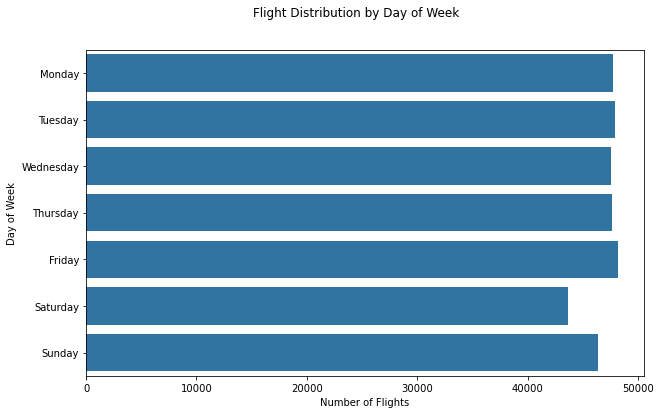

In [25]:
import calendar
day_order = [day for day in calendar.day_name]
# convert the intergers given into the full name for day of week
DayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dfw['day_name'] = dfw['DayOfWeek'].map(DayOfWeek)   # map the DayOfWeek dictionary to convert into name

# lets take a look at the frequency of flights by day of week
dow = dfw.DayOfWeek.value_counts()
base_color = sb.color_palette()[0]

plt.figure(figsize=[10,6])
sb.countplot(data=dfw, y='day_name', color=base_color, order = day_order)
plt.ylabel('Day of Week')
plt.xlabel('Number of Flights')
plt.suptitle('Flight Distribution by Day of Week');

## Distribution of Inbound Arrival Delay and Outbound Departure Delay

For inbound flights, we observe that the majority of flights arrived earlier than scheduduled by around 30 minutes, or on time. The majority of delayed flights are within 60 mins of delays

For outbound flights, we observe that the majority of flights depart earlier than scheduled by around 20 minutes, or on time. The majority of delayed flights are within 60 minutes of delay

Each box on the histogram represents a 1 minute interval

We observe that for outbound flights, the frequency is a lot more precise than spreadout compared to inbound flights. The mode frequency for outbound flights is around 17,000 where inbound mode frequcncy is around 6,000

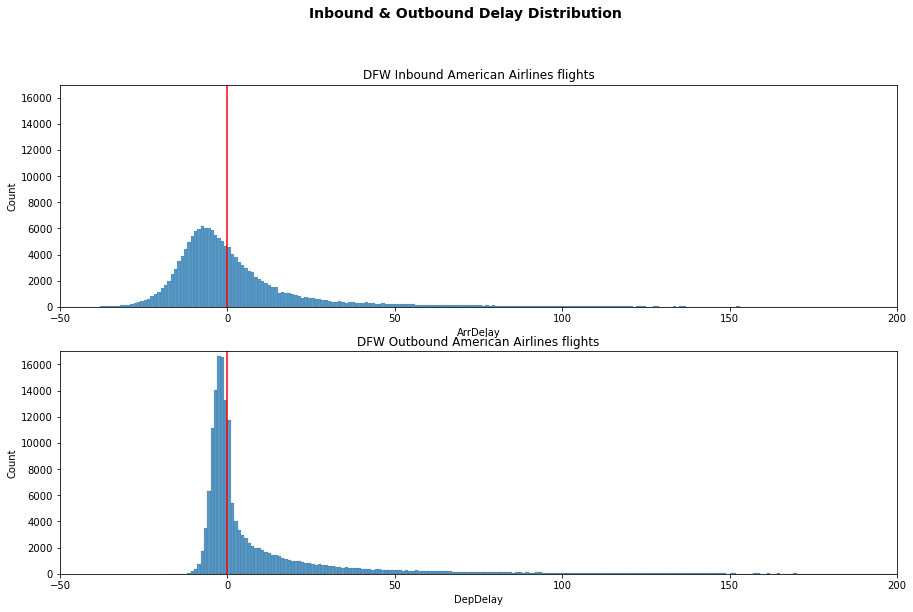

In [40]:
# combine inbound and outbound onto one plot
plt.figure(figsize=[15,9])

# lets take a look at arrival delays for DFW inbound flights
plt.subplot(2,1,1)
bins = np.arange(dfw_inbound.ArrDelay.min(), dfw_inbound.ArrDelay.max()+1, 1) 
sb.histplot(data=dfw_inbound, x='ArrDelay', bins = bins)
plt.xlim([-50,200])
plt.ylim([0,17000])                # this is done so that the inbound and outbound flights are compared on the same y scale
plt.axvline(x=0, color='r')
plt.title('DFW Inbound American Airlines flights');

# Lets take a look at departure delays for DFW outbound flights
plt.subplot(2,1,2)
bins = np.arange(dfw_outbound.DepDelay.min(), dfw_outbound.DepDelay.max()+1, 1)
sb.histplot(data=dfw_outbound, x='DepDelay', bins = bins)
plt.xlim([-50,200])
plt.ylim([0,17000])                # this is done so that the inbound and outbound flights are compared on the same y scale
plt.axvline(x=0, color='r')
plt.title('DFW Outbound American Airlines flights');

plt.suptitle('Inbound & Outbound Delay Distribution'.title(), y=1, fontsize=14, weight='bold');

## Inbound Delay VS Scheduled Arrival Time & 
## Outbound Delay VS Scheduled Departure Time

From this visualization we see that starting around 11 AM, Dallas Local Time, as the day goes on, we can expect more delays up until 7 PM, with a break at 8 PM, and then steady delays until midnight.
For Inbound flights, this helps visualize there are no flights scheduled to arrive between 1 AM - 3 AM.
For Outbound flights, this helps visualize there are no flights scheduled to depart  between 1 AM -5 AM and also 11 PM.
Both inbound and outbound have no scheduled flights for 10 AM and 8 PM

> The average maximum arrival delay is 14.2 minutes, which is at 10 PM

> The average minimum arrival delay is -6.3 minutes, which is at 6 AM

> The average maximum departure delay is 17.2 minutes, which is at 9 PM

> The average minumum departure delay is -1.4 minutes, which is at 6 AM

The negative 1.4 means a flight is expected to depart 1.4 minutes early.
This analysis implies the best time to catch a flight leaving DFW airport is 6 AM.
The most delays for flights leaving DFW happen around 5 PM to 11 PM.
Furthermore, the best time to catch a flight coming into DFW airport is also at 6 AM.
The most delays for flights coming into DFW happen around 5 Pm to 10 PM

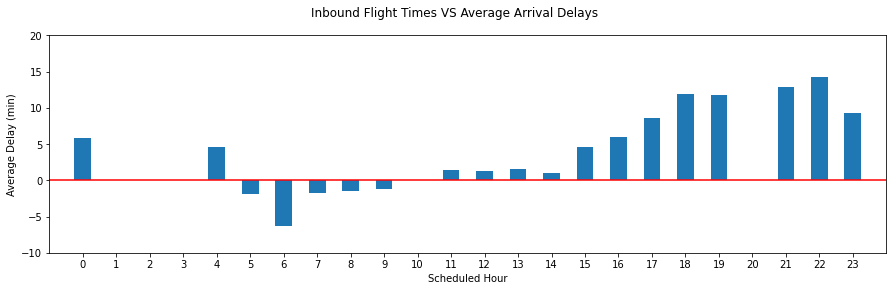

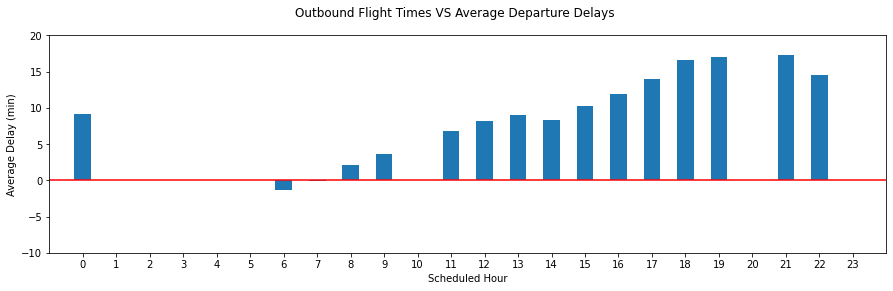

In [15]:
# Does time of day effect delays?

# plot inbound scheduled arrival time vs Average arrival delay
dfw_inbound.resample('H', on = 'CRSArrTime').agg({'ArrDelay':'mean'}).plot.bar(figsize=[15,4],legend=None)
xticks=np.arange(0,24,1)
plt.xticks(xticks,xticks, rotation=0)
plt.xlabel('Scheduled Hour')
plt.ylabel('Average Delay (min)')
plt.suptitle('Inbound Flight Times VS Average Arrival Delays')
plt.axhline(y=0, color='r')
plt.xlim([-1,24])
plt.ylim([-10,20])

# plot outbound scheduled departure time vs Average departure delay
dfw_outbound.resample('H', on = 'CRSDepTime').agg({'DepDelay':'mean'}).plot.bar(figsize=[15,4],legend=None)
xticks=np.arange(0,24,1)
plt.xticks(xticks,xticks, rotation=0)
plt.xlabel('Scheduled Hour')
plt.ylabel('Average Delay (min)')
plt.suptitle('Outbound Flight Times VS Average Departure Delays')
plt.axhline(y=0, color='r')
plt.xlim([-1,24])
plt.ylim([-10,20]);

## Arrival Delays VS Departure Delays by Schedued Hour of the Day

Inbound flights generally experience more depaerture delays than arrival delays, especially when their scheduled departure time is late night.

Outbound flights generally tie between departure and arrival delays, however late hours of the night departure delays are slightly longer.

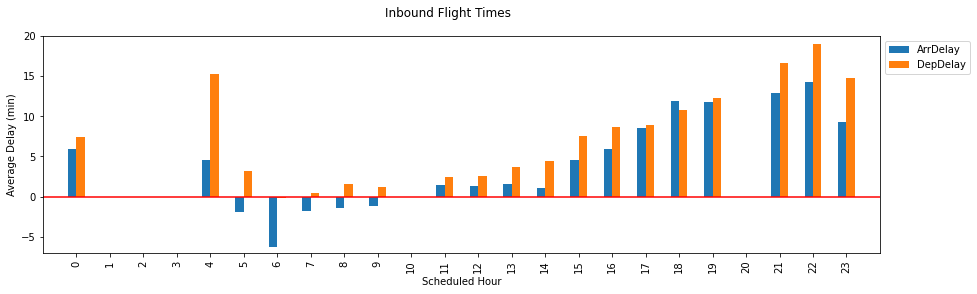

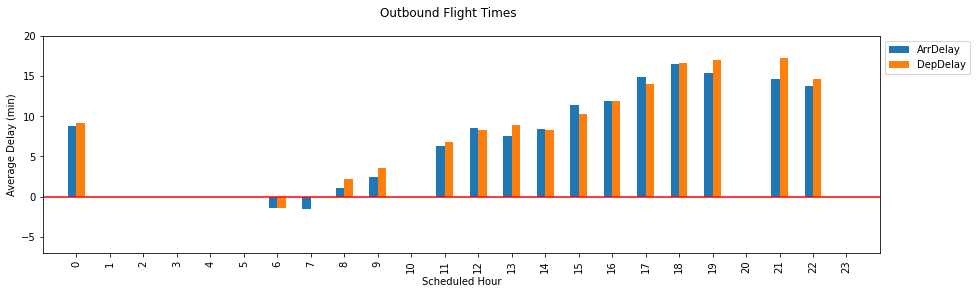

In [42]:
# Does time of day effect delays?

# plot inbound & outbound flights

# plot inbound scheduled arrival time vs arrival delay and departure delay
dfw_inbound.resample('H', on = 'CRSArrTime').agg({'ArrDelay':'mean', 'DepDelay':'mean'}).plot.bar(figsize=[15,4])
xticks=np.arange(0,24,1)
plt.xticks(xticks,xticks)
plt.xlabel('Scheduled Hour')
plt.ylabel('Average Delay (min)')
plt.suptitle('Inbound Flight Times')
plt.axhline(y=0, color='r')
plt.xlim([-1,24])
plt.ylim([-7,20])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


# plot outbound scheduled arrival time vs arrival delay and departure delay
dfw_outbound.resample('H', on = 'CRSDepTime').agg({'ArrDelay':'mean', 'DepDelay':'mean'}).plot.bar(figsize=[15,4])
xticks=np.arange(0,24,1)
plt.xticks(xticks,xticks)
plt.xlabel('Scheduled Hour')
plt.ylabel('Average Delay (min)')
plt.suptitle('Outbound Flight Times')
plt.axhline(y=0, color='r')
plt.xlim([-1,24])
plt.ylim([-7,20])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

## Inbound Delays VS Scheduled Arrival time broken down by day of week

The best day of the week to catch an inbound flight is Tuesday 4 AM. You can expect to arrive on average 15 minutes early; whereas Sunday and Thursday early mornings at 4 AM you can expect to arrive on average 15 minutes late

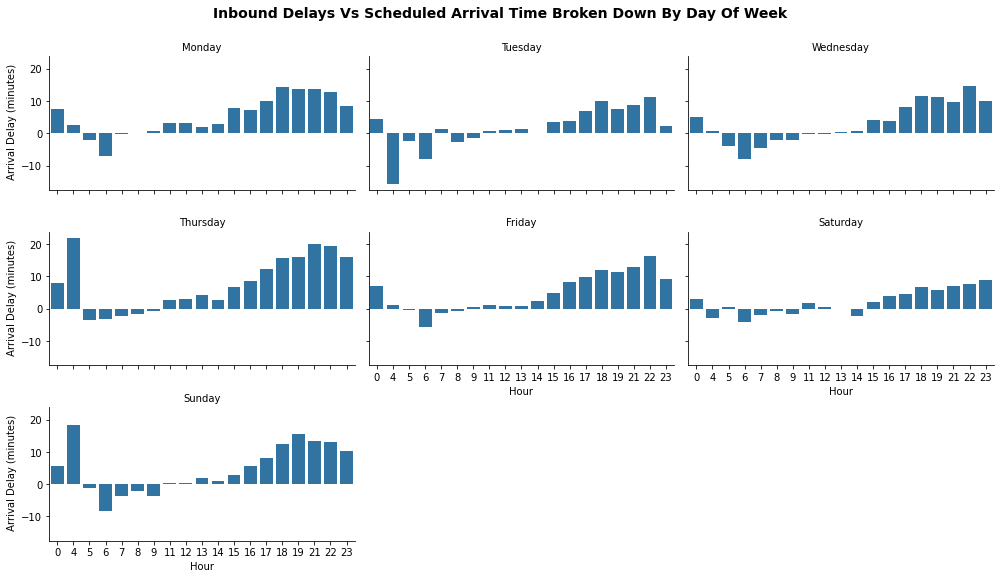

In [25]:
# list days in order
import calendar

day_order = [day for day in calendar.day_name]

# Plot Inbound flight delays by hour of day, then further break it down by day of the week
g = sb.FacetGrid(data=dfw_inbound, col='day_name', margin_titles=True, col_wrap=3, height=4, col_order=day_order)
g.map(sb.barplot, 'hour', 'ArrDelay', ci=None, order=sorted(dfw_inbound.hour.unique()))

# add plot title
plt.suptitle('Inbound Delays VS Scheduled Arrival time broken down by day of week'.title(),y=1, 
             fontsize=14, weight='bold')

# label axes
g.set_axis_labels(x_var='Hour', y_var=' Arrival Delay (minutes)')
g.set_titles('{col_name}')

# set plot dimensions
g.fig.set_size_inches(14, 8)
# optimize distance between subplots 
plt.tight_layout();

## Outbound Delays VS Scheduled Departure time broken down by day of week

The worst day to catch an outbound flight from DFW airport is on Saturday late night at 10 PM, where you can expect a delay of 40 minutes on average

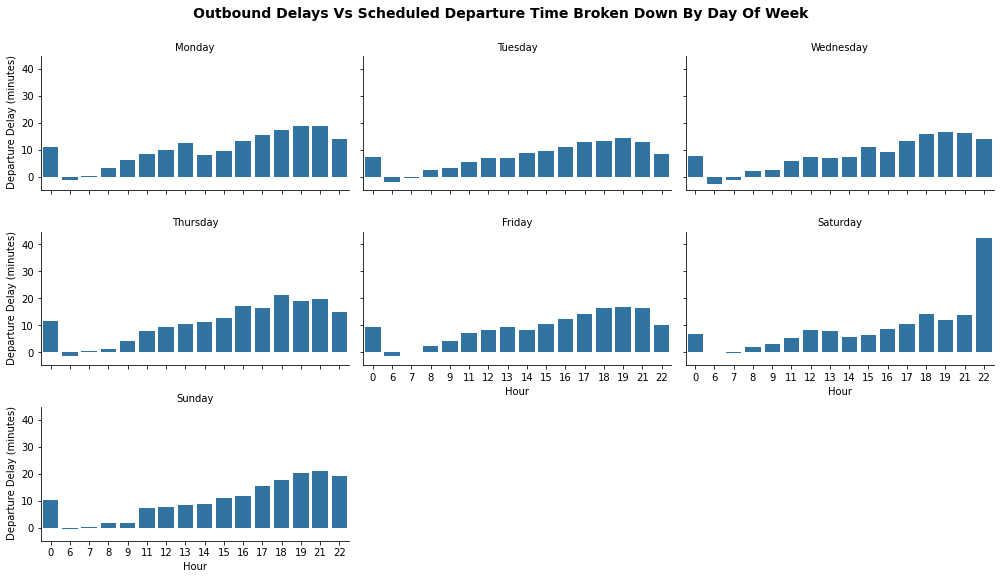

In [28]:
# list days in order
import calendar

day_order = [day for day in calendar.day_name]
# Plot Outbound flight delays by hour of day, then further break it down by day of the week

g = sb.FacetGrid(data=dfw_outbound, col='day_name', margin_titles=True, col_wrap=3, height=4, col_order=day_order)
g.map(sb.barplot, 'hour', 'DepDelay', ci=None, order=sorted(dfw_outbound.hour.unique()))

# add plot title
plt.suptitle('Outbound Delays VS Scheduled Departure time broken down by day of week'.title(),y=1, 
             fontsize=14, weight='bold')

# label axes
g.set_axis_labels(x_var='Hour', y_var=' Departure Delay (minutes)')
g.set_titles('{col_name}')

# set plot dimensions
g.fig.set_size_inches(14, 8)
# optimize distance between subplots 
plt.tight_layout();

## Inbound Arrival Delays by Month

We can see delays get longer during January, then taper off, and delays start getting longer again starting June through August, with the longest delays of the year occuring on July. Delays taper off again and pick up for December into January

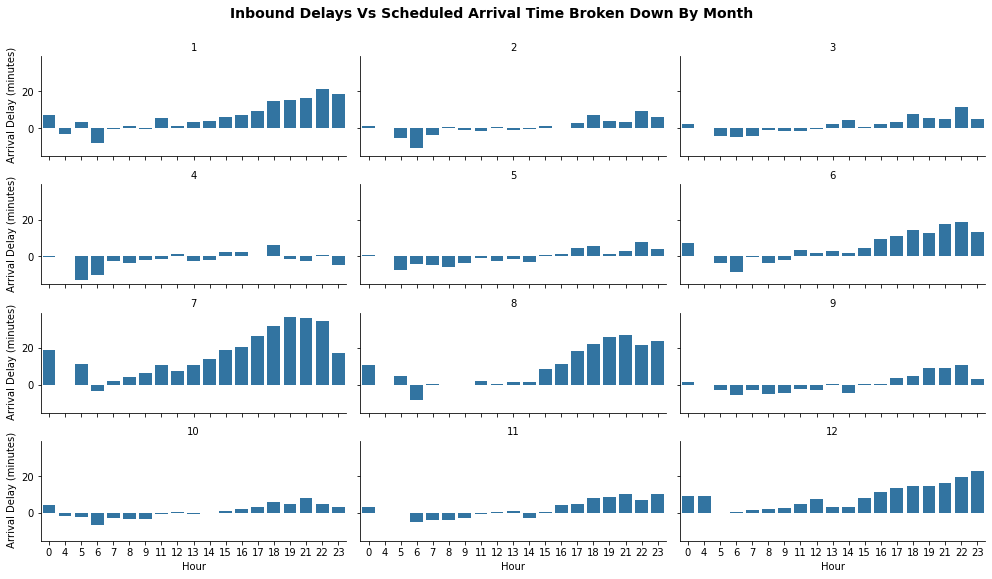

In [21]:
# Plot Inbound Arrival Delays by scheduled arrival time and break down by month
g = sb.FacetGrid(data=dfw_inbound, col='Month', margin_titles=True, col_wrap=3, height=4)
g.map(sb.barplot, 'hour', 'ArrDelay', ci=None, order=sorted(dfw_inbound.hour.unique()));


# add plot title
plt.suptitle('Inbound Delays VS Scheduled Arrival time broken down by Month'.title(),y=1, 
             fontsize=14, weight='bold')

# label axes
g.set_axis_labels(x_var='Hour', y_var=' Arrival Delay (minutes)')
g.set_titles('{col_name}')

# set plot dimensions
g.fig.set_size_inches(14, 8)
# optimize distance between subplots 
plt.tight_layout();

## Outbound Departure Delays by Month

A similar trend is seen to inbound flights where delays during January, June, July, August and December are the longest

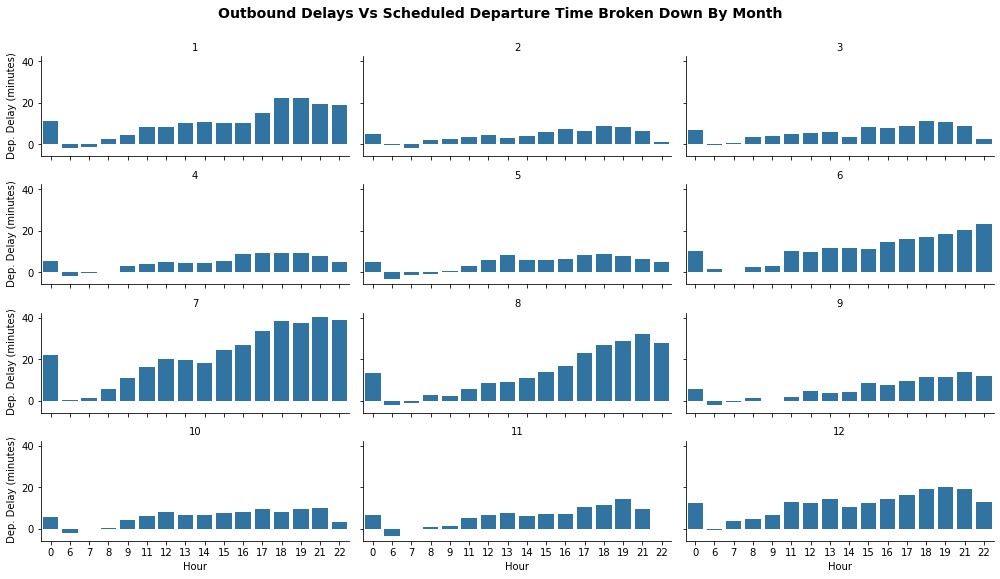

In [10]:
# Plot Outbound Departure Delays by scheduled arrival time and break down by month
g = sb.FacetGrid(data=dfw_outbound, col='Month', margin_titles=True, col_wrap=3, height=4)
g.map(sb.barplot, 'hour', 'DepDelay', ci=None, order=sorted(dfw_outbound.hour.unique()));


# add plot title
plt.suptitle('Outbound Delays VS Scheduled Departure time broken down by Month'.title(),y=1, 
             fontsize=14, weight='bold')

# label axes
g.set_axis_labels(x_var='Hour', y_var=' Dep. Delay (minutes)')
g.set_titles('{col_name}')

# set plot dimensions
g.fig.set_size_inches(14, 8)
# optimize distance between subplots 
plt.tight_layout();

## Inbound/Outbound VS Scheduled time broken down by day of week

Inbound flights have an interesting delay time at 6 AM. On Sundays and Thursday there are heavy delays; Whereas Tuesdays at 6 AM flights arrive around 15 minutes early.

Inbound flights on Thursdays nights can expect above average delays compared to other days of the week.

Outbound flights on late Saturday nights expericence around 40 minutes of departure delays. This would be an interesting insight for American Airlines to further study.

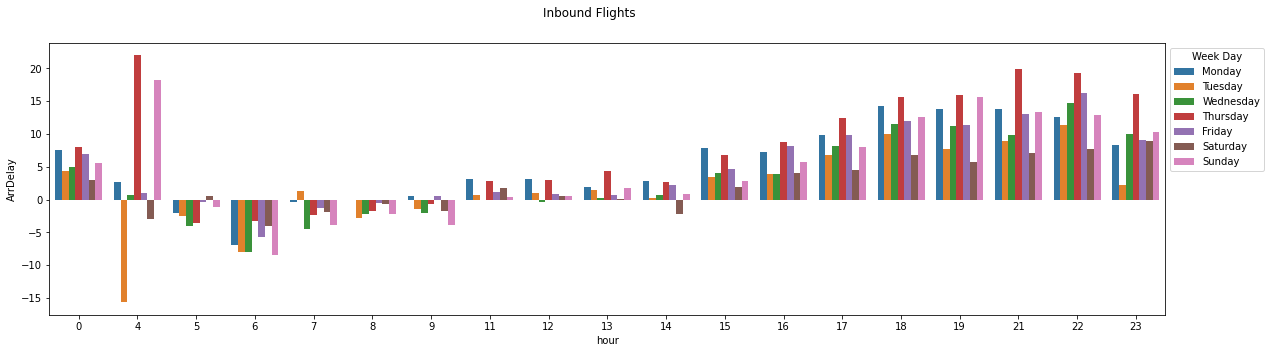

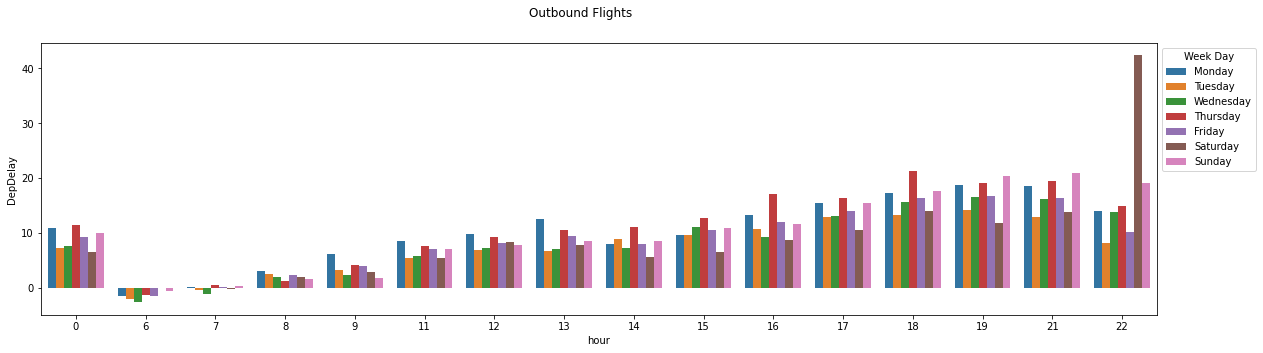

In [32]:
# list days in order
import calendar
day_order = [day for day in calendar.day_name]

# combine day of week and delays into one plot
# Plot inbound flights arrival delays by hour of day and then break further by the day of the week
plt.figure(figsize=[20,5])
sb.barplot(data=dfw_inbound, x='hour', y='ArrDelay', ci=None, hue='day_name', hue_order=day_order)
plt.suptitle('Inbound Flights')
plt.legend(title='Week Day', bbox_to_anchor=(1, 1), loc='upper left')

# Plot outbound flights arrival delays by hour of day and then break further by the day of the week
plt.figure(figsize=[20,5])
sb.barplot(data=dfw_outbound, x='hour', y='DepDelay', ci=None, hue='day_name', hue_order=day_order)
plt.suptitle('Outbound Flights')
plt.legend(title='Week Day', bbox_to_anchor=(1, 1), loc='upper left');

### Possible Explanation for Saturday Night Outbound Delays

I suspect the Saturday night delays could be due to not having enough staff to work the weekend shift, especially considering that Saturdays have a smaller number of flights than usual as seen on this visual

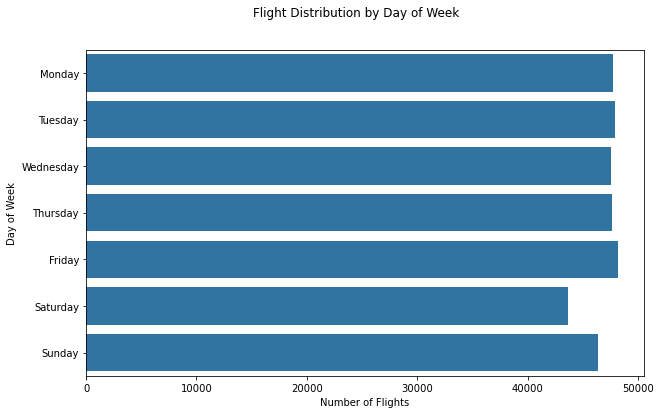

In [14]:
# Its worth repeating this visual from earlier in this exploration to see the distibution of flighty sby day of week
# lets take a look at the frequency of flights by day of week

import calendar
day_order = [day for day in calendar.day_name]
# convert the intergers given into the full name for day of week
DayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dfw['day_name'] = dfw['DayOfWeek'].map(DayOfWeek)   # map the DayOfWeek dictionary to convert into name

# lets take a look at the frequency of flights by day of week
dow = dfw.DayOfWeek.value_counts()
base_color = sb.color_palette()[0]

plt.figure(figsize=[10,6])
sb.countplot(data=dfw, y='day_name', color=base_color, order = day_order)
plt.ylabel('Day of Week')
plt.xlabel('Number of Flights')
plt.suptitle('Flight Distribution by Day of Week');

In [44]:
!jupyter nbconvert explanatory.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook explanatory.ipynb to slides
[NbConvertApp] Writing 1025940 bytes to explanatory.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\abdal\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\abdal\Anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\abdal\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\abdal\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\abdal\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", lin